<a href="https://colab.research.google.com/github/AizazurRahman1/CS-351L-AI-Lab-Repository_2022078/blob/main/Aizaz_ur_rahman_lab8_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training samples: 105, Testing samples: 45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_3 (Dense)               │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307 (1.20 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.2297 - loss: 1.0456 - val_accuracy: 0.1905 - val_loss: 1.0312
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2908 - loss: 1.0169 - val_accuracy: 0.2381 - val_loss: 1.0062
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3171 - loss: 0.9914 - val_accuracy: 0.3810 - val_loss: 0.9826
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4071 - loss: 0.9660 - val_accuracy: 0.4762 - val_loss: 0.9611
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4443 - loss: 0.9414 - val_accuracy: 0.5714 - val_loss: 0.9420
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5337 - loss: 0.9188 - val_accuracy: 0.6190 - val_loss: 0.9252
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5960 - loss: 0.8989 - val_accuracy: 0.5714 - val_loss: 0.9107
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5730 - loss: 0.8816 - val_accuracy: 0.6190 - v

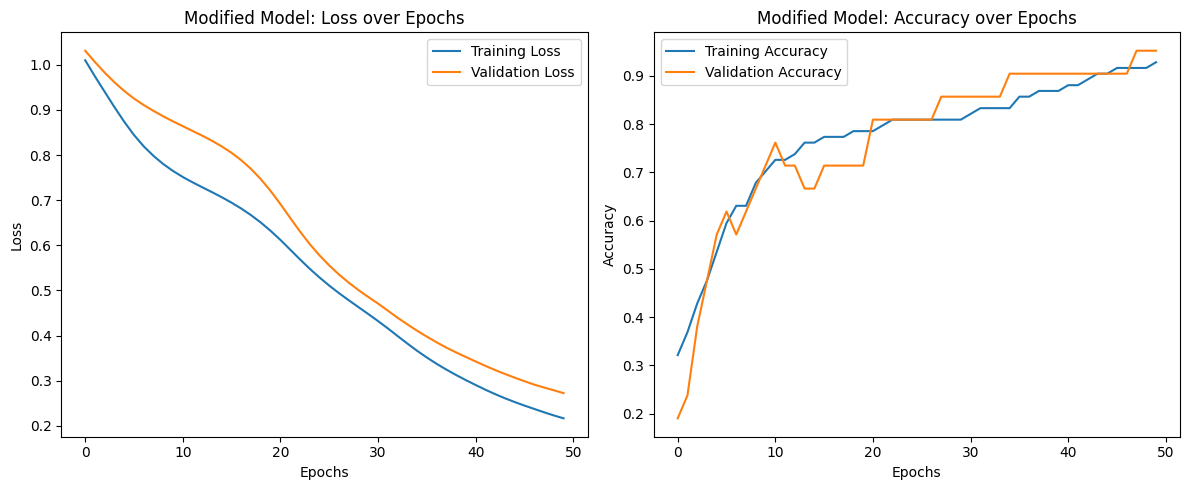

Modified Model - Test Loss: 0.1893, Test Accuracy: 0.9556
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Modified Model - Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



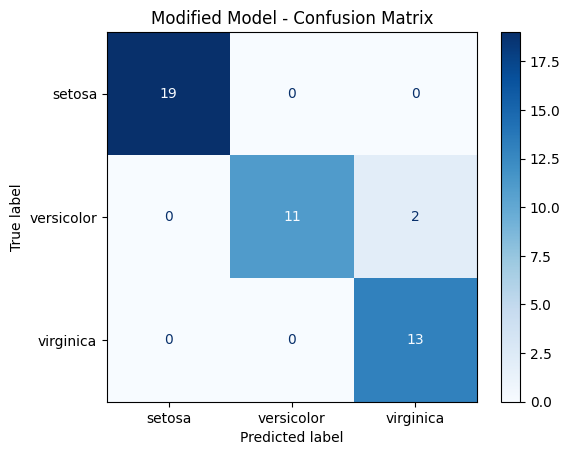

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

modified_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),
    Dense(8, activation='relu', name="Hidden_Layer_2"),
    Dense(16, activation='relu', name="Hidden_Layer_3"),
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")
])

modified_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

modified_model.summary()

modified_history = modified_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(modified_history.history['loss'], label='Training Loss')
plt.plot(modified_history.history['val_loss'], label='Validation Loss')
plt.title('Modified Model: Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(modified_history.history['accuracy'], label='Training Accuracy')
plt.plot(modified_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modified Model: Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

test_loss_modified, test_accuracy_modified = modified_model.evaluate(X_test, y_test, verbose=0)
print(f"Modified Model - Test Loss: {test_loss_modified:.4f}, Test Accuracy: {test_accuracy_modified:.4f}")

y_pred_modified = modified_model.predict(X_test)
y_pred_classes_modified = np.argmax(y_pred_modified, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Modified Model - Classification Report:")
print(classification_report(y_true_classes, y_pred_classes_modified, target_names=target_names))

ConfusionMatrixDisplay.from_predictions(y_true_classes, y_pred_classes_modified, display_labels=target_names, cmap="Blues")
plt.title("Modified Model - Confusion Matrix")
plt.show()
